# MIND: Microsoft News Recommendation

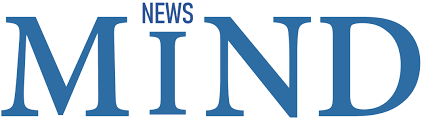

**MIcrosoft News Dataset (MIND)** is a large-scale dataset for news recommendation research. It was collected from anonymized behavior logs of Microsoft News website. The mission of MIND is to serve as a benchmark dataset for news recommendation and facilitate the research in news recommendation and recommender systems area.

MIND contains about **160k English news** articles and **more than 15 million impression logs** generated by **1 million users**. Every news article contains rich textual content including title, abstract, body, category and entities. Each impression log contains the click events, non-clicked events and historical news click behaviors of this user before this impression



## Public Media: Recommender Systems and User`s Interface

April/2021 

Hans Alberto Franke - 6987680

Gianis Fucker

Lena Walcher

<a id='1'></a>
# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from lightgbm import LGBMClassifier
from sklearn.metrics import pairwise_distances
import copy
from IPython.display import clear_output
from eli5.lime import TextExplainer
import warnings
from eli5.lime.samplers import MaskingTextSampler
from re import sub
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plotly.offline.init_notebook_mode (connected = True)

import eli5
from eli5.lime import TextExplainer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from PIL import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import random
warnings.filterwarnings("ignore")

<a id='2'></a>
# Importing the data

In [2]:
#training data
names = ["News ID", "Category" , "SubCategory" , "Title", "Abstract", "URL", "Title Entities", "Abstract Entites"]
data = pd.read_csv(r'Small_data_set\train\news.tsv', sep='\t',header=None, names=names)
names = ["Impression ID", "User ID", "Time", "History", "Impressions"]
behaviors = pd.read_csv(r'Small_data_set\train\behaviors.tsv', sep='\t',header=None, names=names)

#Validation data
data_validation = pd.read_csv(r'Small_data_set\dev\news.tsv', sep='\t',header=None, names=names)



<a id='3'></a>
# Having a look at the data

In [74]:
data


,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."
...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,Realme takes chunk of India mobile market as S...,Over 400 percent more phones shipped year-on-year
51276,N23858,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b..."


In [76]:
behaviors

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


<a id='4'></a>
# Selecting the needed columns

In [4]:
data=data.iloc[:,:5]

In [5]:
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


<a id='5'></a>
# Visualizing The Data

<a id='5.1'></a>
# Category and Subcategory distribution in data

In [6]:
c=data[['Category','SubCategory']].value_counts()

In [7]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [8]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [9]:
df

,Category,Sub Category,Values
0,news,newsus,6564
1,sports,football_nfl,5420
2,news,newspolitics,2826
3,news,newscrime,2254
4,weather,weathertopstories,2047
...,...,...,...
278,finance,finance-home-loans,1
279,finance,finance-homesandpropertysection,1
280,news,newsnational,1
281,news,narendramodi_opinion,1


In [10]:
#display a histogram of categories and subcategories
fig = px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')
fig.write_html("histogram_categories.html", auto_open=True)

### From this we can clearly see that the most of the news was on the Category of news with subcategory newsus followed by sports with football news


# Simpler Recommender: Word Clouds

<a id='5.2'></a>
# WordCloud For Sports News

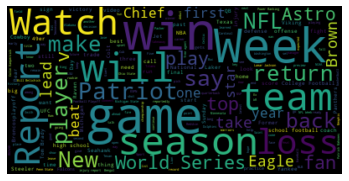

In [11]:

text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


<a id='5.3'></a>
# Wordcloud for news

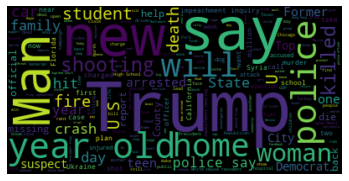

In [12]:
text=' '
for i in data[data['Category']=='news']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


Wow the main attraction of news has been Trump :)

<a id='5.4'></a>
# Histogram For Title Length

In [79]:
t=[]
for i in data['Title']:
    t.append(len(i))
fig = px.histogram(t,color=data['Category'])
fig.write_html("Title Lenght.html", auto_open=True)


Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)

<a id='6'></a>
# Data Preprocessing

<a id='6.1'></a>
## Checking and removing all the duplicate values

In [14]:
print('the number of articles before processing :',len(data))
data.drop_duplicates(subset=['Title'],inplace=True)
print('The number of articles after processing :',len(data))

the number of articles before processing : 51282
The number of articles after processing : 50434


<a id='6.2'></a>
## Checking for NaN values

In [15]:
data.isna().sum()

News ID           0
Category          0
SubCategory       0
Title             0
Abstract       2646
dtype: int64

<AxesSubplot:>

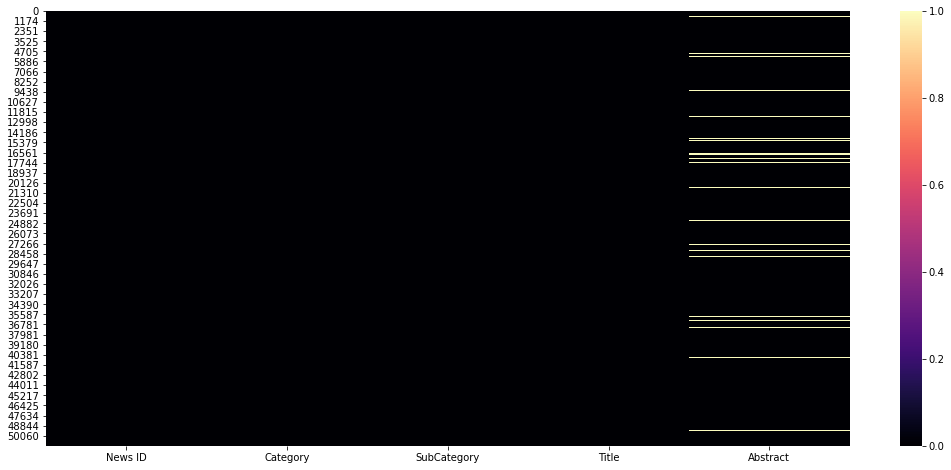

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=True, cmap='magma')


In [17]:
#Remove the NaN (before was not removed!)
data.dropna(inplace=True)

<a id='6.3'></a>
## Getting Titles with more than 4 words

In [18]:
print('the number of articles before processing :',len(data))
data=data[data['Title'].apply((lambda x: len(x.split())>=4))]
print('The number of articles after processing :',len(data))

the number of articles before processing : 47788
The number of articles after processing : 47661


In [19]:
df2=data.copy()

<a id='7'></a>
# Text Preprocessing

In [20]:
# This function is to remove stopwords from a particular column and to tokenize it
import nltk
nltk.download('wordnet')

def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hansf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a
  
  


In [22]:
# Removing Stop words from Title Column
rem_stopwords_tokenize(df2,'Title')

In [23]:
# Lemmatizing the Title column
lemmatize_all(df2,'Title')

In [24]:
# Making a copy of data to use in the future
data4=data.copy()

In [25]:
#data before removing stop words:
df2["Title"][1:5]

1                 [50, Worst, Habits, For, Belly, Fat]
2    [The, Cost, Trump, 's, Aid, Freeze, Trenches, ...
3    [I, Was, An, NBA, Wife, ., Here, 's, How, It, ...
4    [How, Get, Rid, Skin, Tags, ,, According, Derm...
Name: Title, dtype: object

In [26]:
#Data after removal and lemmatizing
data["Title"][1:5]

1                        50 Worst Habits For Belly Fat
2    The Cost of Trump's Aid Freeze in the Trenches...
3    I Was An NBA Wife. Here's How It Affected My M...
4    How to Get Rid of Skin Tags, According to a De...
Name: Title, dtype: object

## Converting Back To String

In [27]:
def convert_to_string(data,name):
    t=data[name].values
    p=[]
    for i in t:
        listToStr = ' '.join(map(str, i))
        p.append(listToStr)
    data[name]=p


In [28]:
convert_to_string(data,'Title')
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,T h e B r a n d s Q u e e n E l i z a b ...,"Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,5 0 W o r s t H a b i t s F o r B e l ...,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,T h e C o s t o f T r u m p ' s A i d ...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I W a s A n N B A W i f e . H e r e ...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,H o w t o G e t R i d o f S k i n ...,"They seem harmless, but there's a very good re..."


## Converting the text

In [29]:
headline_vectorizer = CountVectorizer()


In [30]:
#restore default
data = data4.copy()
data

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."
...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,Realme takes chunk of India mobile market as S...,Over 400 percent more phones shipped year-on-year
51276,N23858,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b..."


# Content Based Filter

<a id='8'></a>
# Bagging Method 

In [31]:
def Euclidean_Distance_based_model(row_index, num_similar_items, data=df):
    #The dataset must receive a clear dataset, with the stop words
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = headline_vectorizer.fit_transform(cate_data['Title'].values)
    couple_dist = pairwise_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',data['Title'][indices[0]])
    print("\n","="*30,"Recommended News : ","="*30)
    return df.iloc[1:,:]
print("example of title, you can copy and paste to facilitate: \n", data['Title'][4])
name=input('News Title For Recommendation :')
clear_output()
ind=data[data['Title']==name].index[0]
#data ha stop words, df2 hasn't!
dd=Euclidean_Distance_based_model(ind, 100, data)
dd.head(10)

============================== News Article Name ==============================
News Headline :  How to Get Rid of Skin Tags, According to a Dermatologist

 ============================== Recommended News :  ==============================


,headline,Category,Abstract,Euclidean similarity with the queried article
1,"[30, Health, Mistakes, You, 're, Making, Public]",health,There are a number of all-too-easy mistakes th...,3.316625
2,"[Silent, Signs, You, Have, Asthma]",health,Wheezing a whistling or squeaky sound made whe...,3.464102
3,"['Souping, ', :, Should, try, ?]",health,Regularly eating soup is comforting and fillin...,3.464102
4,"[Eating, Nuts, Could, Help, You, Lose, Weight]",health,A new study finds eating more nuts can help yo...,3.464102
5,"[7, Running, Workouts, Weight, Loss]",health,It's all about the fartleks.,3.464102
6,"[30, Health, Mistakes, You, Do, n't, Know, You...",health,There are many health mistakes you are probabl...,3.464102
7,"[Can, You, Reverse, Type, 2, Diabetes, ?]",health,When it comes to your approach to managing dia...,3.464102
8,"[Avoid, Biggest, Weight, Loss, Mistakes, With,...",health,It's easy to get caught up with the number on ...,3.464102
9,"[Do, Saunas, Really, Help, You, Lose, Weight, ?]",health,"Saunas only help reduce water weight, which me...",3.464102
10,"[9, Vegetables, You, Should, n't, Eat, Raw]",health,Are raw foods healthier than cooked foods?,3.464102


I think we got some good recommendations here  :)

The thing about using this model is that it gives real less importance to less frequent words but sometimes those are the words that could make some real difference .

<a id='9'></a>
# Using TF-IDF Method

In [32]:
tfidf_headline_vectorizer = TfidfVectorizer(min_df = 0)

def TFIDF_based_model(row_index, num_similar_items,data=df):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = tfidf_headline_vectorizer.fit_transform(cate_data['Title'].values)
    couple_dist = pairwise_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean Distance Similarity': couple_dist[indices].ravel()})
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',data['Title'][indices[0]])
    print("\n","="*26,"Recommended News Using TFIDf: ","="*30)
    return df.iloc[1:,:]
name=input('News Title For Recommendation :')
clear_output()
ind=data[data['Title']==name].index[0]
dd=TFIDF_based_model(ind, 100,data)
dd.head(10)

============================== News Article Name ==============================
News Headline :  How to Get Rid of Skin Tags, According to a Dermatologist

 ========================== Recommended News Using TFIDf:  ==============================


,headline,Category,Abstract,Euclidean Distance Similarity
1,"[30, Health, Mistakes, You, Do, n't, Know, You...",health,There are many health mistakes you are probabl...,1.135751
2,"[30, Health, Mistakes, You, 're, Making, Public]",health,There are a number of all-too-easy mistakes th...,1.151986
3,"[Avoid, Biggest, Weight, Loss, Mistakes, With,...",health,It's easy to get caught up with the number on ...,1.160911
4,"[These, Are, 7, Worst, Diet, Mistakes, Weight,...",health,We asked three registered dietitians to share ...,1.173388
5,"[Exactly, What, Happens, Your, Body, When, You...",health,Life would be a lot easier if losing weight wa...,1.232006
6,"[15, Food, Myths, That, Are, Causing, You, Gai...",health,"When it comes to watching your weight, if you ...",1.254229
7,"[The, Midlife, Weight-Gain, Struggle, Is, Real...",health,Even if you haven't changed your diet and exer...,1.273674
8,"[Just, Half, Serving, Nuts, Per, Day, Might, H...",health,Looking for a snack to keep you on track to lo...,1.294103
9,"[25, Easy, Ways, Lose, Those, Last, 5, Pounds]",health,When it comes to figuring out how to lose 5 po...,1.300514
10,"[Retailers, pulling, Johnson, 's, baby, powder...",health,"Retailers including CVS, Walgreens, Rite Aid a...",1.300846


WEll the recommendations are different and looks better :) 

Let's see if we can make it much better :)

### Why TFIDF is good ??

* It’s fast and works well when documents are large and/or have lots of overlap.
* It looks for exact matches, so at the very least you should use a lemmatizer to take care of the plurals.
* When comparing short documents with limited-term variety — such as search queries — there is a risk that you will miss semantic relationships where there isn’t an exact word match.

# Colaborative filtering

<a id='10'></a>
# Let's Make A Category Recommendation System Too

In [92]:
X=data['Title'].values
y=data['Category'].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

<a id='the_destination'></a>
# Debugging the Recommendation model 


In [94]:
def print_report(pipe):
    y_pred = pipe.predict(X_test)
    p=np.unique(y_test)
    report = metrics.classification_report(y_test, y_pred,
        target_names=p)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))



<a id='10.1'></a>
# Truncated SVD and Decision Tree Classifier

In [95]:
vec = TfidfVectorizer(min_df=4)
svd = TruncatedSVD(n_components=400, n_iter=8, random_state=42)
lsa = make_pipeline(vec, svd)
ds=DecisionTreeClassifier()
pipe = make_pipeline(lsa, ds)

In [96]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.35401076998391495

In [97]:
# Making report for decision tree classifier
print_report(pipe)

               precision    recall  f1-score   support

        autos       0.10      0.10      0.10       445
entertainment       0.11      0.11      0.11       176
      finance       0.14      0.15      0.14       887
 foodanddrink       0.23      0.23      0.23       779
       health       0.13      0.14      0.13       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.11      0.11      0.11       682
   middleeast       0.00      0.00      0.00         1
       movies       0.07      0.07      0.07       177
        music       0.08      0.08      0.08       227
         news       0.50      0.49      0.49      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.57      0.55      0.56      3849
       travel       0.10      0.10      0.10       667
           tv       0.05      0.05      0.05       266
        video       0.07      0.08      0.08       601
      weather       0.15      0.15      0.15       513

     acc

<a id='10.2'></a>
# Pipeline using TruncatedSVD and XGBClassifier

In [98]:
vec = TfidfVectorizer(min_df=0)
svd = TruncatedSVD(n_components=10, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
xgb=XGBClassifier()
pipe = make_pipeline(lsa, xgb)

In [99]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

[10:09:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4587733407930625

In [100]:
# Making report for pipeline using XGBClassifier
print_report(pipe)

               precision    recall  f1-score   support

        autos       0.29      0.06      0.09       445
entertainment       0.14      0.01      0.02       176
      finance       0.20      0.04      0.06       887
 foodanddrink       0.29      0.18      0.22       779
       health       0.20      0.09      0.13       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.17      0.07      0.10       682
   middleeast       0.00      0.00      0.00         1
       movies       0.17      0.01      0.02       177
        music       0.22      0.01      0.02       227
         news       0.47      0.75      0.57      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.52      0.72      0.60      3849
       travel       0.21      0.04      0.07       667
           tv       0.08      0.00      0.01       266
        video       0.17      0.02      0.03       601
      weather       0.49      0.16      0.24       513

     acc

<a id='10.3'></a>
# Pipeline using TruncatedSVD and LGBMClassifier

In [101]:
vec = TfidfVectorizer(min_df=0)
svd = TruncatedSVD(n_components=100, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
lgm=LGBMClassifier()
pipe2 = make_pipeline(lsa, lgm)

In [102]:
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.42548429960137074

In [103]:
# Making report for pipeline using LGBMClassifier
print_report(pipe2)

               precision    recall  f1-score   support

        autos       0.28      0.13      0.18       445
entertainment       0.08      0.11      0.09       176
      finance       0.18      0.08      0.11       887
 foodanddrink       0.33      0.26      0.29       779
       health       0.14      0.12      0.13       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.20      0.12      0.15       682
   middleeast       0.00      0.00      0.00         1
       movies       0.11      0.08      0.09       177
        music       0.09      0.07      0.08       227
         news       0.48      0.63      0.54      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.57      0.65      0.61      3849
       travel       0.14      0.06      0.08       667
           tv       0.03      0.02      0.02       266
        video       0.08      0.04      0.05       601
      weather       0.36      0.32      0.34       513

     acc

In [104]:
data['Title'][0]

'The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By'

In [105]:
p=np.unique(y_test)

def print_prediction(doc):
    y_pred = pipe2.predict_proba([doc])[0]
    for target, prob in zip(p, y_pred):
        print("{:.3f} {}".format(prob, target))

doc = data['Title'][0]
print_prediction(doc)

0.000 autos
0.000 entertainment
0.000 finance
0.000 foodanddrink
0.000 health
0.000 kids
1.000 lifestyle
0.000 middleeast
0.000 movies
0.000 music
0.000 news
0.000 northamerica
0.000 sports
0.000 travel
0.000 tv
0.000 video


# XBGClassifier worked the best amongst all 3 it gave 43% accuracy

<a id='11'></a>
# Let's have a look at the text explainer 

In [106]:
te = TextExplainer(random_state=42)
te.fit(doc, pipe2.predict_proba)
te.show_prediction(target_names=list(p))

## Explanation makes sense - we expect reasonable classifier to take highlighted words in account. 

## A custom sampler instance can be passed to TextExplainer if we want to experiment with sampling.

<a id='12'></a>
# Text Explainer with char analyzer

In [48]:
vec = TfidfVectorizer(min_df=0, analyzer='char',
                      ngram_range=(3,6))
svd = TruncatedSVD(n_components=100, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
lgm=LGBMClassifier()
pipe3 = make_pipeline(lsa, lgm)

In [49]:
pipe3.fit(X_train, y_train)
pipe3.score(X_test, y_test)

0.4894048534862578

In [50]:
# Making report for decision tree classifier
print_report(pipe3)

               precision    recall  f1-score   support

        autos       0.28      0.16      0.20       445
entertainment       0.16      0.09      0.11       176
      finance       0.27      0.12      0.17       887
 foodanddrink       0.45      0.38      0.41       779
       health       0.34      0.22      0.27       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.25      0.18      0.21       682
   middleeast       0.00      0.00      0.00         1
       movies       0.17      0.08      0.11       177
        music       0.12      0.05      0.07       227
         news       0.52      0.69      0.59      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.60      0.75      0.67      3849
       travel       0.22      0.10      0.14       667
           tv       0.08      0.05      0.06       266
        video       0.14      0.04      0.06       601
      weather       0.44      0.35      0.39       513

     acc

In [51]:
sampler = MaskingTextSampler(

    token_pattern='.',

    max_replace=3,

    # by default all tokens are replaced;
    # replace only a token at a given position.
    bow=False,
)
samples, similarity = sampler.sample_near(doc)
print(samples[0])


The Brands Queen Elizabeth, Prnce Charles, and Prince Pilip Swear By


In [52]:
y_test

array(['sports', 'video', 'sports', ..., 'foodanddrink', 'sports',
       'finance'], dtype=object)

In [53]:
te = TextExplainer(char_based=True, sampler=sampler, random_state=42)
te.fit(doc, pipe3.predict_proba)
te.show_prediction()


### Metrics:
‘score’ is an accuracy score weighted by cosine distance between generated sample and the original document (i.e. texts which are closer to the example are more important). Accuracy shows how good are ‘top 1’ predictions.
‘mean_KL_divergence’ is a mean Kullback–Leibler divergence for all target classes; it is also weighted by distance. KL divergence shows how well are probabilities approximated; 0.0 means a perfect match.

In [54]:
print(te.metrics_)


{'mean_KL_divergence': 0.5302124161196315, 'score': 0.6446855245045094}


This is text explainer which tries to explain the text and their classes :)

<a id='13'></a>
# Let's See The Influence Of Words On Deciding categories

In [55]:
all_title=''
for i in data['Title'].values:
    all_title+=i+' '
# Let's select 40 random words from this 
x=[]
for i in range(30):
    x.append(random.choice(all_title.split(' ')))

In [56]:
# Getting probablities of being a class
probs=pipe3.predict_proba(x)

In [57]:
# Getting labels of the words
labels=pipe3.predict(x)

In [58]:
svd = TruncatedSVD(n_components=3, n_iter=4, random_state=42)

In [59]:
transformed=svd.fit_transform(probs)

In [60]:
fig = px.scatter_3d(x=transformed[:,0],y=transformed[:,1],color=labels,z=transformed[:,2],text=x)
fig.write_html('Categories based on words.html', auto_open=True)

# Behaviors Prediction

In [61]:
behaviors

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [62]:
#Check for missing values
behaviors.isna().sum()

Impression ID       0
User ID             0
Time                0
History          3238
Impressions         0
dtype: int64

In [63]:
#remove missing values (change for 0)
behaviors['History'].fillna(0,inplace=True)
#check if it works
behaviors.loc[28]

Impression ID                                                   29
User ID                                                     U33207
Time                                        11/11/2019 11:09:14 AM
History                                                          0
Impressions      N62212-0 N27521-0 N28983-0 N12028-0 N25437-0 N...
Name: 28, dtype: object

In [64]:
#create a new data frame, splitting news and clicked 0 and 1
dataset = behaviors.copy()
dataset = behaviors[['Impression ID', "User ID", "Impressions", "Time"]]
dataset['Impressions'] = dataset['Impressions'].str.split(' ').tolist()
dataset = dataset.explode('Impressions')
dataset.reset_index(drop=True,inplace=True)
dataset

,Impression ID,User ID,Impressions,Time
0,1,U13740,N55689-1,11/11/2019 9:05:58 AM
1,1,U13740,N35729-0,11/11/2019 9:05:58 AM
2,2,U91836,N20678-0,11/12/2019 6:11:30 PM
3,2,U91836,N39317-0,11/12/2019 6:11:30 PM
4,2,U91836,N58114-0,11/12/2019 6:11:30 PM
...,...,...,...,...
5843439,156964,U44625,N39317-0,11/13/2019 2:57:02 PM
5843440,156965,U64800,N61233-0,11/14/2019 3:25:49 PM
5843441,156965,U64800,N33828-1,11/14/2019 3:25:49 PM
5843442,156965,U64800,N19661-0,11/14/2019 3:25:49 PM


In [65]:
#create depented variable: click or not
dataset['Clicked'] = dataset["Impressions"].str.contains("-1")
dataset

,Impression ID,User ID,Impressions,Time,Clicked
0,1,U13740,N55689-1,11/11/2019 9:05:58 AM,True
1,1,U13740,N35729-0,11/11/2019 9:05:58 AM,False
2,2,U91836,N20678-0,11/12/2019 6:11:30 PM,False
3,2,U91836,N39317-0,11/12/2019 6:11:30 PM,False
4,2,U91836,N58114-0,11/12/2019 6:11:30 PM,False
...,...,...,...,...,...
5843439,156964,U44625,N39317-0,11/13/2019 2:57:02 PM,False
5843440,156965,U64800,N61233-0,11/14/2019 3:25:49 PM,False
5843441,156965,U64800,N33828-1,11/14/2019 3:25:49 PM,True
5843442,156965,U64800,N19661-0,11/14/2019 3:25:49 PM,False


In [66]:
#remove old part ("-1" or '-0')
dataset['Impressions'] = dataset['Impressions'].map(lambda x: x.rstrip("-1").rstrip("-0"))
dataset

,Impression ID,User ID,Impressions,Time,Clicked
0,1,U13740,N55689,11/11/2019 9:05:58 AM,True
1,1,U13740,N35729,11/11/2019 9:05:58 AM,False
2,2,U91836,N20678,11/12/2019 6:11:30 PM,False
3,2,U91836,N39317,11/12/2019 6:11:30 PM,False
4,2,U91836,N58114,11/12/2019 6:11:30 PM,False
...,...,...,...,...,...
5843439,156964,U44625,N39317,11/13/2019 2:57:02 PM,False
5843440,156965,U64800,N61233,11/14/2019 3:25:49 PM,False
5843441,156965,U64800,N33828,11/14/2019 3:25:49 PM,True
5843442,156965,U64800,N19661,11/14/2019 3:25:49 PM,False


In [67]:
data = data[['News ID', "Category", "SubCategory", "Title", "Abstract"]]
dataset_merged = dataset.merge(data,left_on='Impressions', right_on='News ID')
dataset_merged

,Impression ID,User ID,Impressions,Time,Clicked,News ID,Category,SubCategory,Title,Abstract
0,1,U13740,N55689,11/11/2019 9:05:58 AM,True,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
1,7,U8355,N55689,11/11/2019 12:22:09 PM,False,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
2,10,U53231,N55689,11/11/2019 11:28:11 AM,False,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
3,16,U17841,N55689,11/11/2019 10:53:09 AM,False,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
4,26,U91678,N55689,11/11/2019 8:20:38 AM,True,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
...,...,...,...,...,...,...,...,...,...,...
5409305,156715,U44237,N2936,11/13/2019 5:29:46 AM,False,N2936,tv,tvnews,What CM Punk's return means for WWE,"CLEVELAND, Ohio Nearly six years after quitti..."
5409306,156775,U33510,N7197,11/14/2019 2:56:06 PM,False,N7197,news,newsus,"DPW employees, family demand change after work...",Some Baltimore City Department of Public Works...
5409307,156775,U33510,N32689,11/14/2019 2:56:06 PM,False,N32689,news,newspolitics,Former Baltimore Mayor Stephanie Rawlings-Blak...,Former Baltimore Mayor Stephanie Rawlings-Blak...
5409308,156831,U17207,N13975,11/10/2019 7:41:42 AM,False,N13975,sports,baseball_mlb,Yankees 2019 Roster Report Card: Jonathan Holder,Holder's poor performance earned him a trip to...


### Prediction Users Behaviors (Click or not)

In [68]:
#Balance the samples! 
dataset_merged['Clicked'].value_counts()


False    5194597
True      214713
Name: Clicked, dtype: int64

In [108]:
from sklearn.utils import resample
#separate majority and minority classes
dataset_minority = dataset_merged[dataset_merged['Clicked']==1]
dataset_majoraty = dataset_merged[dataset_merged['Clicked']==0]

#upsample miniroty class
dataset_minority_upsampled = resample(dataset_minority,
                                     replace=True,
                                     n_samples=int(len(dataset_merged)/2)  #half of the samples
                                     ) 

dataset_majority_upsampled = resample(dataset_majoraty,
                                     replace=True,
                                     n_samples=int(len(dataset_merged)/2) #half of the samples
                                    ) 
#combine the samples
dataset_upsamples = pd.concat([dataset_minority_upsampled,dataset_majority_upsampled])

#Check new values
dataset_upsamples['Clicked'].value_counts()

False    2704655
True     2704655
Name: Clicked, dtype: int64

In [109]:
#Split traind and test set
#X = dataset_merged[['Category',"SubCategory","Title", "Abstract"]].values
X = dataset_upsamples['Title'].values
y = dataset_upsamples['Clicked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


In [110]:
#Lets try to train and predict!
vec = TfidfVectorizer(min_df=4)
svd = TruncatedSVD(n_components=10, n_iter=8, random_state=42)
lsa = make_pipeline(vec, svd)
xgb=XGBClassifier()
pipe = make_pipeline(lsa, xgb)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

[10:23:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6838487718396616

              precision    recall  f1-score   support

       False       0.69      0.71      0.70    810985
        True       0.70      0.68      0.69    811808

    accuracy                           0.69   1622793
   macro avg       0.69      0.69      0.69   1622793
weighted avg       0.69      0.69      0.69   1622793



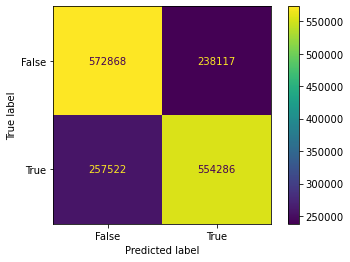

In [72]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

#plot the confusion matrix
plot_confusion_matrix(pipe, X_test, y_test)

from sklearn.metrics import classification_report

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


In [156]:
#Put in the dataset a predict field to compare with real clicked values!
y_pred = pipe.predict_proba(dataset_upsamples['Title'].values)

y_pred

array([[0.431355  , 0.568645  ],
       [0.431355  , 0.568645  ],
       [0.333059  , 0.666941  ],
       ...,
       [0.4872945 , 0.5127055 ],
       [0.5803745 , 0.41962552],
       [0.6239335 , 0.3760665 ]], dtype=float32)

In [157]:
y_pred_value = pipe.predict(dataset_upsamples['Title'].values)

In [158]:
y_pred

array([[0.431355  , 0.568645  ],
       [0.431355  , 0.568645  ],
       [0.333059  , 0.666941  ],
       ...,
       [0.4872945 , 0.5127055 ],
       [0.5803745 , 0.41962552],
       [0.6239335 , 0.3760665 ]], dtype=float32)

In [159]:
y_pred_value

array([ True,  True,  True, ...,  True, False, False])

In [160]:
#Create a new field based on the probabilities (it will be use to ranked it later)
dataset_upsamples['Prediction'] = y_pred[:,1]
dataset_upsamples.head()

,Impression ID,User ID,Impressions,Time,Clicked,News ID,Category,SubCategory,Title,Abstract,Prediction
3712786,7421,U44438,N60992,11/13/2019 6:22:14 AM,True,N60992,music,music-celebrity,Gwen Stefani Reveals New Nickname for Her and ...,The singer said she is 'really excited' about ...,0.568645
3717292,95453,U18591,N60992,11/13/2019 5:19:23 AM,True,N60992,music,music-celebrity,Gwen Stefani Reveals New Nickname for Her and ...,The singer said she is 'really excited' about ...,0.568645
4291944,137897,U36959,N41717,11/14/2019 3:48:55 PM,True,N41717,finance,personalfinance,Olympic swimmer Ryan Lochte went from earning ...,After two suspensions and losing multiple spon...,0.666941
3212485,20755,U79068,N42634,11/12/2019 10:42:36 AM,True,N42634,health,nutrition,The Latest Weight Loss Pills That Work And the...,"When diet and exercise aren't working, the ans...",0.506457
2997469,1830,U82491,N36789,11/12/2019 5:52:55 AM,True,N36789,news,newsus,Fox legal analyst Napolitano emerges as Trump ...,NEW YORK (AP) More than two decades into his...,0.612336


In [161]:
#Drop duplicates because of the balance of dataset
dataset_unique = dataset_upsamples.copy()
dataset_unique = dataset_unique.drop_duplicates()
dataset_unique

,Impression ID,User ID,Impressions,Time,Clicked,News ID,Category,SubCategory,Title,Abstract,Prediction
3712786,7421,U44438,N60992,11/13/2019 6:22:14 AM,True,N60992,music,music-celebrity,Gwen Stefani Reveals New Nickname for Her and ...,The singer said she is 'really excited' about ...,0.568645
3717292,95453,U18591,N60992,11/13/2019 5:19:23 AM,True,N60992,music,music-celebrity,Gwen Stefani Reveals New Nickname for Her and ...,The singer said she is 'really excited' about ...,0.568645
4291944,137897,U36959,N41717,11/14/2019 3:48:55 PM,True,N41717,finance,personalfinance,Olympic swimmer Ryan Lochte went from earning ...,After two suspensions and losing multiple spon...,0.666941
3212485,20755,U79068,N42634,11/12/2019 10:42:36 AM,True,N42634,health,nutrition,The Latest Weight Loss Pills That Work And the...,"When diet and exercise aren't working, the ans...",0.506457
2997469,1830,U82491,N36789,11/12/2019 5:52:55 AM,True,N36789,news,newsus,Fox legal analyst Napolitano emerges as Trump ...,NEW YORK (AP) More than two decades into his...,0.612336
...,...,...,...,...,...,...,...,...,...,...,...
634371,18012,U24828,N26286,11/11/2019 8:14:45 AM,False,N26286,finance,finance-real-estate,Climate change could end mortgages as we know ...,The traditional 30-year home loan along with...,0.428944
4083,33951,U43269,N55689,11/11/2019 10:24:01 AM,False,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",0.881543
897339,19557,U32739,N24176,11/10/2019 11:22:10 AM,False,N24176,health,weightloss,Ree Drummond Says a Low-Carb Diet Is the Secre...,The Pioneer Woman's new cookbook is out now!,0.596673
3982058,116446,U73448,N42515,11/14/2019 3:08:27 PM,False,N42515,news,newsus,Trump admin preparing to take over private lan...,The Trump administration is preparing court fi...,0.512706


In [162]:
#Check user preferences / Original Clicked Values
user = "U66653"
lista = dataset_unique[(dataset_unique['User ID'] == user)&(dataset_unique['Clicked'] == True)]['Category'].value_counts()/dataset_unique[(dataset_unique['User ID'] == user)&(dataset_unique['Clicked'] == True)]['Category'].count()
print("Sum of %", lista.sum())
lista


Sum of % 1.0


sports           0.25
news             0.20
music            0.15
foodanddrink     0.10
weather          0.10
video            0.10
tv               0.05
entertainment    0.05
Name: Category, dtype: float64

In [228]:
#Predict 10 news to the user and evaluate the diversity and accuracy!
check = dataset_unique[dataset_unique['User ID'] == user].sort_values(by=['Prediction'], ascending=False).head(10)
check['Correct'] = np.where(check['Clicked'] == (check['Prediction']>=0.5),1,0)
check_accuracy = check.Correct.value_counts()[1]/10*100
check_diversity = len(check.Category.unique())/ len(dataset_unique.Category.unique())*100

print("Accuracy prediction {}%".format(check_accuracy))
print("Diversity {}% ".format(check_diversity)) #Users prediction categories / total categories!
check

Accuracy prediction 80.0%
Diversity 31.25% 


,Impression ID,User ID,Impressions,Time,Clicked,News ID,Category,SubCategory,Title,Abstract,Prediction,Correct
3184896,147904,U66653,N49279,11/10/2019 12:54:35 PM,False,N49279,music,musicnews,Broadway Actress Laurel Griggs Dies at Age 13,"Broadway star Laurel Griggs has died, accordin...",0.932887,0
3180267,30637,U66653,N49279,11/10/2019 10:32:00 AM,True,N49279,music,musicnews,Broadway Actress Laurel Griggs Dies at Age 13,"Broadway star Laurel Griggs has died, accordin...",0.932887,1
314460,152223,U66653,N49685,11/10/2019 4:56:45 PM,False,N49685,music,music-celebrity,Broadway Star Laurel Griggs Suffered Asthma At...,"Teen star Laurel Griggs, who passed away on No...",0.915869,0
12709,108287,U66653,N55689,11/11/2019 7:36:31 AM,True,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",0.881543,1
538589,130505,U66653,N33619,11/12/2019 6:46:37 AM,True,N33619,news,newsus,College gymnast dies following training accide...,"Melanie Coleman, 20, of Milford, was practicin...",0.870299,1
33241,152223,U66653,N35729,11/10/2019 4:56:45 PM,True,N35729,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,0.869358,1
3197191,3868,U66653,N6397,11/12/2019 12:34:53 PM,True,N6397,foodanddrink,recipes,"What to Cook This Weekend: October 18 20, 2019","Saucy citrus chicken, cheesy baked pasta, and ...",0.845516,1
3395007,104200,U66653,N61233,11/14/2019 4:26:02 PM,True,N61233,weather,weathertopstories,Nor'easter to grind at US East Coast this weekend,"High winds, heavy surf and drenching rain will...",0.767285,1
5398196,37734,U66653,N44443,11/13/2019 7:29:07 AM,True,N44443,news,newsus,New England fire lieutenant dies battling 4-al...,One firefighter died and several other firefig...,0.764092,1
1179357,149652,U66653,N12029,11/12/2019 9:47:52 PM,True,N12029,music,music-celebrity,John Legend Is PEOPLE's Sexiest Man Alive 2019...,John Legend Is PEOPLE's Sexiest Man Alive 2019,0.744219,1


### Improve Diversity and check accuracy

In [244]:
#Improve Diversity
range_find = 30
list_news = dataset_unique[dataset_unique['User ID'] == user].sort_values(by=['Prediction'], ascending=False).head(range_find).reset_index()
indexes_categories = []
categories = []
for i in range(range_find):
    cat = list_news.loc[i]['Category']
    index = list_news.loc[i]['index']
    if cat not in categories:
        categories.append(cat)
        indexes_categories.append(index)
recomendations = dataset_unique[dataset_unique['User ID'] == user].sort_values(by=['Prediction'], ascending=False).head(range_find)
recomendations = recomendations.loc[indexes_categories].head(10)

#create a field to check for correct predicitons
recomendations['Correct'] = np.where(recomendations['Clicked'] == (recomendations['Prediction']>=0.5),1,0)

#see the results:
improve_accuracy = recomendations.Correct.value_counts()[1]/len(recomendations)*100
improve_diversity = len(recomendations.Category.unique())/ len(dataset_unique.Category.unique())*100
print("Accuracy prediction {}%".format(improve_accuracy))
print("Accuracy gain: {}%".format(round( (improve_accuracy-check_accuracy),2 )))
print("Diversity {}% ".format(improve_diversity)) #Users prediction categories / total categories!
print("Diversity gain: {}%".format(improve_diversity-check_diversity))
recomendations

Accuracy prediction 44.44444444444444%
Accuracy gain: -35.56%
Diversity 56.25% 
Diversity gain: 25.0%


,Impression ID,User ID,Impressions,Time,Clicked,News ID,Category,SubCategory,Title,Abstract,Prediction,Correct
3184896,147904,U66653,N49279,11/10/2019 12:54:35 PM,False,N49279,music,musicnews,Broadway Actress Laurel Griggs Dies at Age 13,"Broadway star Laurel Griggs has died, accordin...",0.932887,0
12709,108287,U66653,N55689,11/11/2019 7:36:31 AM,True,N55689,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",0.881543,1
538589,130505,U66653,N33619,11/12/2019 6:46:37 AM,True,N33619,news,newsus,College gymnast dies following training accide...,"Melanie Coleman, 20, of Milford, was practicin...",0.870299,1
3197191,3868,U66653,N6397,11/12/2019 12:34:53 PM,True,N6397,foodanddrink,recipes,"What to Cook This Weekend: October 18 20, 2019","Saucy citrus chicken, cheesy baked pasta, and ...",0.845516,1
3395007,104200,U66653,N61233,11/14/2019 4:26:02 PM,True,N61233,weather,weathertopstories,Nor'easter to grind at US East Coast this weekend,"High winds, heavy surf and drenching rain will...",0.767285,1
5277090,147904,U66653,N18884,11/10/2019 12:54:35 PM,False,N18884,video,animals,Rejected duckling finds a new family member: a...,"At Christine Haydon's farm, a duckling was rej...",0.660606,0
3867603,104200,U66653,N4138,11/14/2019 4:26:02 PM,False,N4138,finance,finance-career-education,Wright State University names next president,Provost Susan Edwards has been named as Wright...,0.602376,0
5320014,3868,U66653,N2286,11/12/2019 12:34:53 PM,False,N2286,travel,travelnews,Delta Partners With TSA Pre-Check For Smoother...,The airline is trying to create better airport...,0.579740,0
5206241,130505,U66653,N409,11/12/2019 6:46:37 AM,False,N409,lifestyle,lifestylepetsanimals,12 Most Affectionate Cat Breeds,Not all cats want their space. These cuddly fe...,0.574318,0
